Modified Dataset - Train Accuracy: 0.9030
Modified Dataset - Test Accuracy: 0.5682
Misclassified images: 19
Misclassified Indices: [ 2  4  5  6  8  9 10 12 14 18 20 23 27 30 31 32 35 37 39]


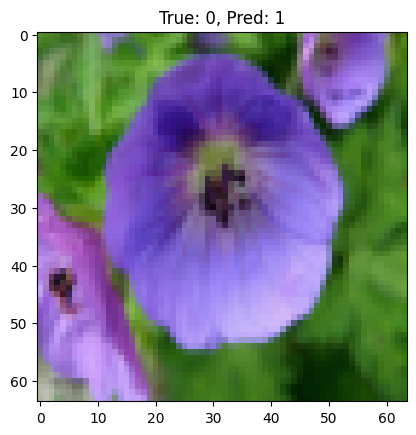

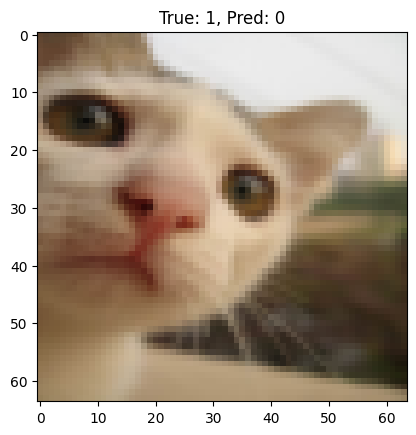

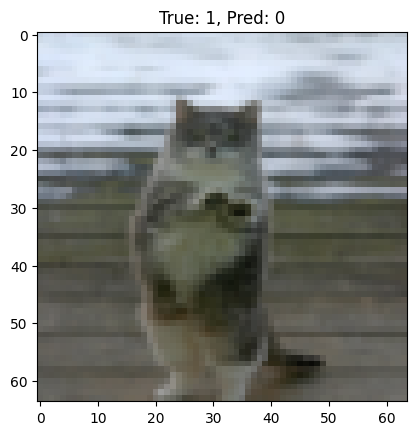

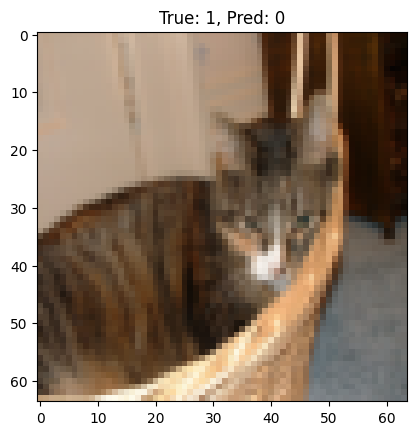

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset from an HDF5 file
def load_dataset(file_path):
    # Open the HDF5 file in read mode
    with h5py.File(file_path, 'r') as f:
        X = np.array(f['train_set_x'][:])  # Load the training images as a numpy array
        y = np.array(f['train_set_y'][:])  # Load the corresponding labels
    return X, y  # Return images and labels

# Preprocess the data by normalizing and flattening the images
def preprocess_data(X, y):
    X = X / 255.0  # Normalize the pixel values to the range [0, 1] by dividing by 255
    X = X.reshape(X.shape[0], -1)  # Flatten each image (convert from 64x64x3 to a 1D array)
    y = np.where(y == 1, 1, 0)  # Ensure binary labels, converting other labels to 0
    return X, y  # Return the processed data

# Logistic Regression Class
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate  # Learning rate for the gradient descent
        self.num_iterations = num_iterations  # Number of iterations for the gradient descent
        self.theta = None  # Initialize theta (weights) as None

    def sigmoid(self, z):
        # Sigmoid function to output values between 0 and 1
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape  # Get the number of examples (m) and features (n)
        self.theta = np.zeros(n)  # Initialize theta as a vector of zeros

        for _ in range(self.num_iterations):  # Loop for the specified number of iterations
            predictions = self.sigmoid(np.dot(X, self.theta))  # Calculate the predicted values
            error = predictions - y  # Compute the error between predicted and actual labels
            gradient = (1 / m) * np.dot(X.T, error)  # Compute the gradient
            self.theta -= self.learning_rate * gradient  # Update the weights (theta) using gradient descent

    def predict(self, X):
        # Predict the labels for the input data
        predictions = self.sigmoid(np.dot(X, self.theta))  # Calculate the predicted probabilities
        return (predictions >= 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

    def accuracy(self, X, y):
        # Calculate accuracy by comparing predicted and true labels
        return np.mean(self.predict(X) == y)  # Return the mean accuracy

# Display misclassified images
def display_misclassified_images(X, y, model, misclassified_indices):
    print("Misclassified Indices: " + str(misclassified_indices))
    for idx in misclassified_indices[:4]:  # Display up to the first 4 misclassified images
        plt.imshow(X[idx].reshape(64, 64, 3))  # Reshape the flattened image back to 64x64x3
        plt.title(f"True: {y[idx]}, Pred: {model.predict(X[idx].reshape(1, -1))[0]}")  # Show true and predicted labels
        plt.show()  # Show the image

# Train and evaluate model on both training and testing datasets
def train_and_evaluate(X_train, y_train, X_test, y_test, modified):
    model = LogisticRegression(learning_rate=0.001, num_iterations=1000)  # Initialize logistic regression model
    model.fit(X_train, y_train)  # Train the model on the training data

    # Calculate and print the accuracy for the training and testing sets
    train_acc = model.accuracy(X_train, y_train)
    test_acc = model.accuracy(X_test, y_test)
    print(f"{'Modified' if modified else 'Original'} Dataset - Train Accuracy: {train_acc:.4f}")
    print(f"{'Modified' if modified else 'Original'} Dataset - Test Accuracy: {test_acc:.4f}")

    # Identify and print misclassified images
    misclassified_indices = np.where(model.predict(X_test) != y_test)[0]
    print(f"Misclassified images: {len(misclassified_indices)}")
    display_misclassified_images(X_test, y_test, model, misclassified_indices)  # Display misclassified images

# Main program to run the workflow
if __name__ == "__main__":
    file_path = 'train_catvnoncat.h5'  # Define the path to the dataset file
    X, y = load_dataset(file_path)  # Load the dataset
    X, y = preprocess_data(X, y)  # Preprocess the data (normalize and flatten)

    student_id_last_digit = 5  # My Stony Brook ID: 116491705

    num_train = 160 + student_id_last_digit

    # Split the dataset into training and testing sets
    X_train = X[:num_train]  # Training data: first 'num_train' samples
    y_train = y[:num_train]  # Training labels: corresponding labels
    X_test = X[num_train:]  # Test data: remaining samples
    y_test = y[num_train:]  # Test labels: corresponding labels

    # Train and evaluate the model on the modified dataset
    train_and_evaluate(X_train, y_train, X_test, y_test, modified=True)